In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf
from PIL import Image

## NDVI Image

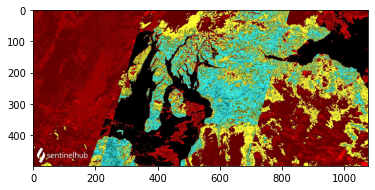

In [2]:
ndvi_img = plt.imread('/Users/clement/Desktop/astropi/Sentinel-2 L1C image on 2020-12-01.jpg')
plt.imshow(ndvi_img)
plt.show()

In [3]:
ndvi_img.shape

(500, 1076, 3)

In [ ]:
im = Image.open(r'/Users/clement/Desktop/astropi/Sentinel-2 L1C image on 2020-12-01.jpg') 
# Size of the image in pixels (size of orginal image) 
# (This is not mandatory) 
width, height = im.size 
  
# Setting the points for cropped image 
left = 5
top = height / 4
right = 164
bottom = 3 * height / 4
  
area = (400, 0, 800, 800)
cropped_img = im.crop(area)
# Cropped image of above dimension 
# (It will not change orginal image) 
  
# Shows the image in image viewer 
cropped_img.show() 

In [ ]:
type(cropped_img)

In [ ]:
plt.imshow(cropped_img)

In [ ]:
type(cropped_img)

In [ ]:
boxes = [400, 0, 800, 400]

In [ ]:
tf.image.crop_and_resize(
    ndvi_img, boxes, box_indices, crop_size, method='bilinear', extrapolation_value=0,
    name=None
)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2()

In [ ]:
model.summary()

In [ ]:
model.input

In [ ]:
model.output

## Bangkok ISS

In [2]:
img_bangkok = Image.open(r'/Users/clement/Desktop/astropi/bangkok.jpg') 

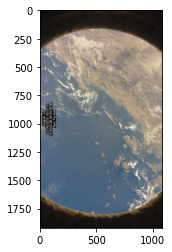

In [3]:
plt.imshow(img_bangkok)
plt.show()

In [4]:
img_bangkok_np = np.array(img_bangkok)

In [5]:
img_bangkok_np.shape

(1920, 1080, 3)

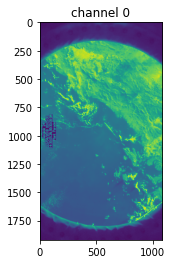

In [6]:
plt.imshow(img_bangkok_np[:,:,0])
plt.title('channel 0')
plt.show()

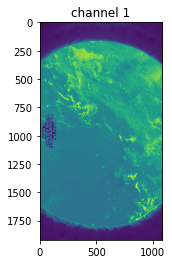

In [7]:
plt.imshow(img_bangkok_np[:,:,1])
plt.title('channel 1')
plt.show()

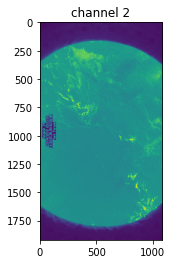

In [8]:
plt.imshow(img_bangkok_np[:,:,2])
plt.title('channel 2')
plt.show()

# Bangkok NDVI

In [4]:
import cv2
image = cv2.imread('/Users/clement/Desktop/astropi/bangkok.jpg') 
b, g, r = cv2.split(image)

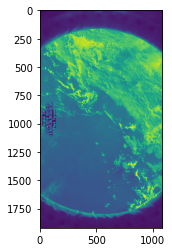

In [11]:
plt.imshow(r)
plt.show()

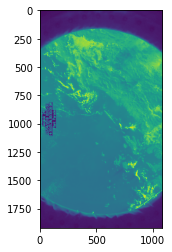

In [9]:
plt.imshow(g)
plt.show()

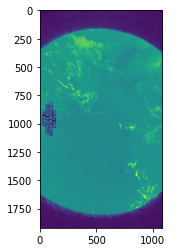

In [10]:
plt.imshow(b)
plt.show()

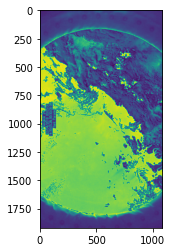

In [12]:
plt.imshow(r+b)
plt.show()

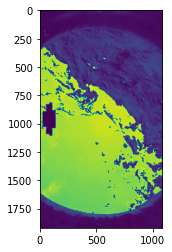

In [13]:
plt.imshow(b)
plt.show()

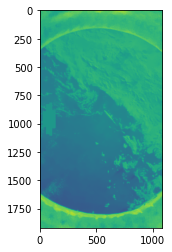

In [39]:
ndvi = (r.astype(float)-b.astype(float))/(r.astype(float)+b.astype(float)+0.0001)
#ndvi = contrast_stretch(ndvi)
#ndvi = ndvi.astype(np.uint8)
plt.imshow(ndvi)
plt.show()

In [36]:
ndvi = (r.astype(float)-b.astype(float))/(r.astype(float)+b.astype(float)+0.0001)
ndvi = contrast_stretch(ndvi)
ndvi = ndvi.astype(np.uint8)

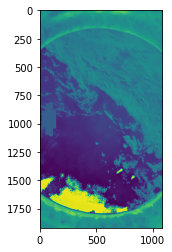

In [37]:
plt.imshow(ndvi)
plt.show()

In [ ]:
https://github.com/rubenmak/raspberry-pi-ndvi-plant-analysis/blob/master/ndvi.py

In [19]:
# Calculate the NDVI
bottom = (r.astype(float) + b.astype(float))
bottom[bottom == 0] = 0.00001  # Make sure we don't divide by zero!

ndvi = (r.astype(float) - b) / bottom
ndvi = contrast_stretch(ndvi)
ndvi = ndvi.astype(np.uint8)

# Do the labelling
#label(image, 'original')
#label(ndvi, 'NDVI')

# Display
#cv2.imshow('NDVI Image', ndvi)
#cv2.imshow('Original Image', image)

In [20]:
ndvi

array([[114, 125,  92, ...,  78,  78,  78],
       [105, 111,  91, ...,  78,  78,  78],
       [114, 109,  89, ..., 117,  90,  90],
       ...,
       [123, 133, 142, ..., 117, 133, 120],
       [137, 137, 142, ..., 130, 111, 109],
       [133, 126, 137, ..., 146,  96,  89]], dtype=uint8)

In [11]:
r.astype(float)

array([[14., 11., 11., ..., 14., 10., 11.],
       [18., 15., 12., ..., 15., 14., 13.],
       [14., 16., 15., ..., 13., 13., 13.],
       ...,
       [19., 16., 14., ..., 13., 16., 20.],
       [15., 15., 14., ..., 10., 15., 16.],
       [16., 18., 15., ...,  8.,  9., 14.]])

In [12]:
b.astype(float)

array([[11.,  8., 10., ..., 14., 10., 11.],
       [15., 12., 11., ..., 15., 14., 13.],
       [11., 13., 14., ..., 10., 12., 12.],
       ...,
       [14., 11.,  9., ..., 10., 11., 15.],
       [10., 10.,  9., ...,  7., 12., 13.],
       [11., 13., 10., ...,  5.,  8., 13.]])

In [13]:
r-b

array([[3, 3, 1, ..., 0, 0, 0],
       [3, 3, 1, ..., 0, 0, 0],
       [3, 3, 1, ..., 3, 1, 1],
       ...,
       [5, 5, 5, ..., 3, 5, 5],
       [5, 5, 5, ..., 3, 3, 3],
       [5, 5, 5, ..., 3, 1, 1]], dtype=uint8)

In [14]:
r+b

array([[25, 19, 21, ..., 28, 20, 22],
       [33, 27, 23, ..., 30, 28, 26],
       [25, 29, 29, ..., 23, 25, 25],
       ...,
       [33, 27, 23, ..., 23, 27, 35],
       [25, 25, 23, ..., 17, 27, 29],
       [27, 31, 25, ..., 13, 17, 27]], dtype=uint8)

In [15]:
ndvi = (r-b)/(r+b)

In [21]:
cv2.imshow('NDVI Image', ndvi)

In [15]:
def contrast_stretch(im):
    """
    Performs a simple contrast stretch of the given image, from 5-100%.
    """
    in_min = np.percentile(im, 5)
    in_max = np.percentile(im, 100)

    out_min = 0.0
    out_max = 255.0

    out = im - in_min
    out *= ((out_min - out_max) / (in_min - in_max))
    out += in_min

    return out